<h1> Programming for Physics <br> Lecture 8: Motion Simulation I </h1>
<a target="_blank" href="https://colab.research.google.com/github/slxuphys/tamu_phys_150/blob/master/lecture/lecture%2008%201D_motion.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Computer Simulation

Using programming and mathematical models to replicate the behavior of complex real-world systems over time. These simulations are often used to study and predict the behavior of systems in fields such as physics, engineering, chemistry, biology, economics, and social sciences.


# motion along a straight line



## How to describe a motion: kinematics

<div style='border:solid thick black;border-radius:30px;width:50%'>

- when? time $t$
- where? position $r$
- how fast? velocity $v$
- gas or brake? acceleration $a$

</div>



The most important quantity is the position as a function of time
$$
x(t)
$$

<img src="../gallery/velocity.png" width="1000">

The instantaneous velocity and acceleration are the first and second derivatives of position with respect to time
$$
v(t)  = \lim\limits_{dt \rightarrow 0} \frac{x(t+dt)-x(t)}{dt} =  \frac{d x(t)}{dt}
$$

$$
a(t) = \lim\limits_{dt \rightarrow 0} \frac{v(t+dt)-v(t)}{dt} =\frac{d v(t)}{dt}
$$

Velocity is the rate of change of position, and acceleration is the rate of change of velocity.

Acceleration is the most fundamental quantity in mechanics, because it is directly related to force via Newton's second law
$$
F = m a
$$
where $F$ is usually known from the problem, and $m$ is the mass of the object.

__We will learn how to obtain $x(t)$ using simulation and how to graph it.__

---

## Motion with constant velocity

<img src='https://github.com/slxuphys/tamu_phys_150/blob/master/gallery/motion_constant_v.png?raw=true' style='height:300px' height=300>


<div style = 'display:flex;align-items:center;height:300px'>


<img src='https://github.com/slxuphys/tamu_phys_150/blob/master/gallery/motion_constant_v_graph.png?raw=true' style='height:300px' height=300>

<div>

The time-graph of position: position as a function of time

The slope of the curve gives the velocity

</div>
</div>

In [2]:
import matplotlib.pyplot as plt #package for plotting
import numpy as np #package for array

Text(0, 0.5, 'position')

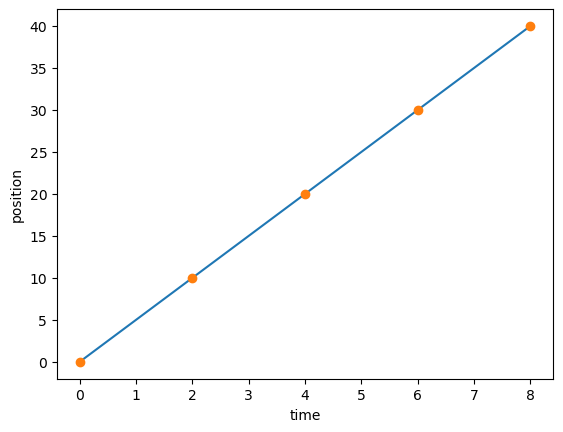

In [ ]:
num_step=5
v=5
t_max = 10

dt = t_max/num_step

time_list = np.arange(0,t_max,dt) # numpy array [0, dt, 2*dt, ..., t_max-dt]
pos_list = time_list*v

plt.plot(time_list, pos_list)
plt.plot(time_list, pos_list, 'o')
plt.xlabel('time')
plt.ylabel('position')

---

## Another way to think about this motion

<img src='https://github.com/slxuphys/tamu_phys_150/blob/master/gallery/motion_constant_v.png?raw=true' style='height:300px' height=300>


__updating the position step by step__


<div>

$$
x_{n+1} = x_n + v\Delta t
$$

$$
t_{n+1} = t_{n} + \Delta t
$$

</div>

<div>

We can get $x$ and $t$ and step $n+1$ by updating $x$ and $t$ at step $n$.

</div>

The position of the ball in the next step only depend on the current position and velocity. 

> __The key idea for simulating motion using programming is to break down the continuous motion into discrete time steps with small time increment. This is also the idea behind calculus.__

In other words, computer simulates motion __step by step__. The simulation becomes more accurate but also more costly as the number of step increases.

With the initial condition and the update rule, one can predict the motion for arbitrarily long time.



Text(0, 0.5, 'position')

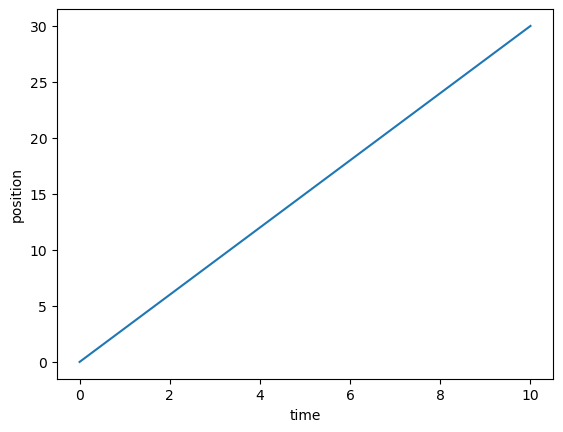

In [13]:
#method2: simulation step by step
pos=0.0
t=0.0
v=3.0
t_max=10
num_step=100
dt=t_max/num_step

time_list=[t]
pos_list=[pos] #initial values

for i_step in range(num_step):
    t=t+dt #updating the time from the last step
    pos=pos+v*dt  #updating the position from the last step
    time_list.append(t) #store the new time
    pos_list.append(pos)#store the new position
#print(time_list)
#print(pos_list)
plt.plot(time_list,pos_list)
plt.xlabel('time')
plt.ylabel('position')

---

### Bouncing between two walls

<div style='display:flex;align-items:center'>

<img src='https://github.com/slxuphys/tamu_phys_150/blob/master/gallery/motion_two_wall.png?raw=true' style='height:300px' height=300>

Invert the velocity when the ball hits the wall

</div>

Text(0, 0.5, 'position')

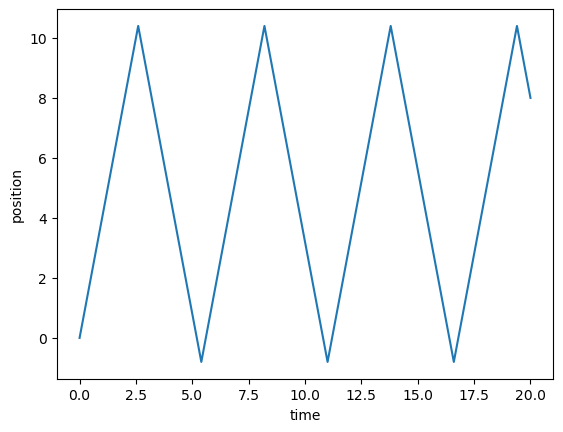

In [33]:
pos=0.0
t=0.0
v=4.0
t_max=20

num_step=100
dt=t_max/num_step
length = 10

time_list=[pos]
pos_list=[t] #initial values

for i_step in range(num_step):
    t=t+dt #updating the time
    pos=pos+v*dt  #updating the position 
    
    if pos>length: #if the ball reaches the right wall
        v=-v # invert the velocity so the ball moves to the left
    if pos<0:
        v=-v #invert the velocity so the ball moves to the right
    time_list.append(t) #store the new time
    pos_list.append(pos)#store the new position
#print(time_list)
#print(pos_list)
plt.plot(time_list,pos_list)
plt.xlabel('time')
plt.ylabel('position')


As a check, at $t = 20s$, the ball should return to $r = 0$ after bouncing back and forth between the walls four times.

The simulation seems to be inaccurate! What is the source of error and how to fix it?


Every time the ball exceeds the boundary, we simply revert the velocity, but the position is still wrong. This is due to the discrete time step. This error can build up overtime and make the simulation __inaccurate__. 

- Make `num_step` larger so dt is smaller. Try rerunning the previous code with `num_step=10000`.
- correct the wrong position when the ball exceeds the boundary using the rule of reflection.


__make it more accurate by correcting the position__



<img src='https://github.com/slxuphys/tamu_phys_150/blob/master/gallery/motion_boundary.png?raw=true' style='height:500px' height=500>

relate the wrong position to the correct position:

<img src='https://github.com/slxuphys/tamu_phys_150/blob/master/gallery/motion_boundary2.png?raw=true' style='height:400px' height=400>

Text(0, 0.5, 'position')

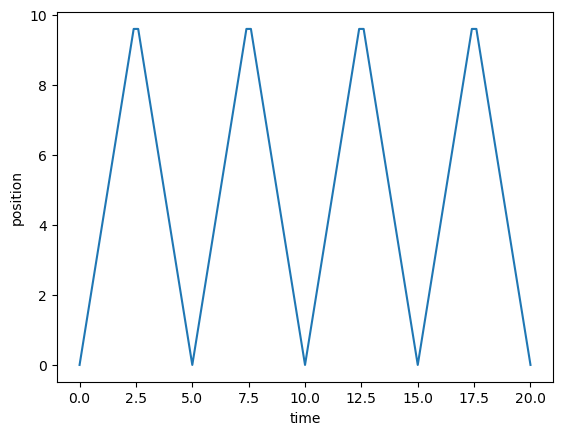

In [35]:
pos=0.0
t=0.0
v=4.0
t_max=20
num_step=100
dt=t_max/num_step
length = 10

time_list=[pos]
pos_list=[t] #initial values

for i_step in range(num_step):
    t=t+dt #updating the time
    pos=pos+v*dt  #updating the position 
    
    if pos>length: #if the ball reaches the right wall
        v=-v # invert the velocity so the ball moves to the left
        r_wall=length
        pos=2*r_wall-pos #correct the position; 
        #think about why; if the new pos=11, it should actually be 9 =10 - (11 -10) due to reflection
    if pos<0:
        v=-v #invert the velocity so the ball moves to the right
        r_wall=0
        pos=2*r_wall-pos #correct the position and put the ball back into the physical range
    time_list.append(t) #store the new time
    pos_list.append(pos)#store the new position
#print(time_list)
#print(pos_list)
plt.plot(time_list,pos_list)
plt.xlabel('time')
plt.ylabel('position')


## constant acceleration
<img src='https://github.com/slxuphys/tamu_phys_150/blob/master/gallery/motion_constant_a.png?raw=true' style='height:250px' height=250>

$$ 
a =1m/s^2 
$$

Text(0, 0.5, 'position')

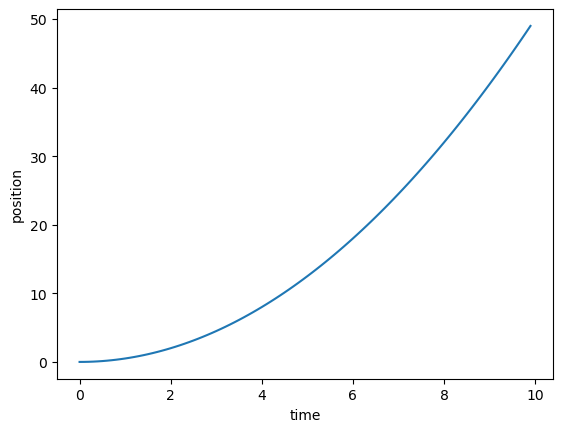

In [3]:
a =1.0
t_max=10
num_step=100
dt=t_max/num_step

time_list = np.arange(0,t_max,dt) # numpy array [0, dt, 2*dt, ..., t_max-dt]
v_list=time_list*a
pos_list= 0.5*a*time_list**2
plt.plot(time_list, pos_list)
plt.xlabel('time')
plt.ylabel('position')

### simulate motion with constant acceleration

<img src='https://github.com/slxuphys/tamu_phys_150/blob/master/gallery/motion_constant_a.png?raw=true' style='height:250px' height=250>

__Can we develop a similar scheme to get $x_n$, $v_n$ from the previous step?__

From the definition of velocity and acceleration:
$$
v(t)  = \lim\limits_{dt \rightarrow 0} \frac{x(t+dt)-x(t)}{dt} =  \frac{d x(t)}{dt}
$$

$$
a(t) = \lim\limits_{dt \rightarrow 0} \frac{v(t+dt)-v(t)}{dt} =\frac{d v(t)}{dt}
$$

We get the update rules:
$$
v(t+dt) = v(t) + a d t
$$

$$
x(t+dt) = x(t) + v(t)d t
$$


This is accurate when $dt$ is very small. Note that for motion with constant acceleration, $a(t)$ is a constant.

### Euler method for motion with constant acceleration

\begin{equation}
\begin{aligned}
t_{n+1} &= t_{n} + \Delta t \\
v_{n+1} &= v_{n} + a \Delta t\\
x_{n+1} &= x_{n} + v_{n+1} \Delta t ?
\end{aligned}
\end{equation}
The last equation is an __approximation__. Although the velocity is increasing, during each time interval from step n to step n+1, the velocity does not change much as long as $\Delta t$ is small. Therefore we can approximate the motion in this small time interval as a motion of constant velocity. Therefore $x_{n+1}\approx x_n + v_{n+1}\Delta t$

### case I: constant acceleration with zero initial velocity

Text(0, 0.5, 'position')

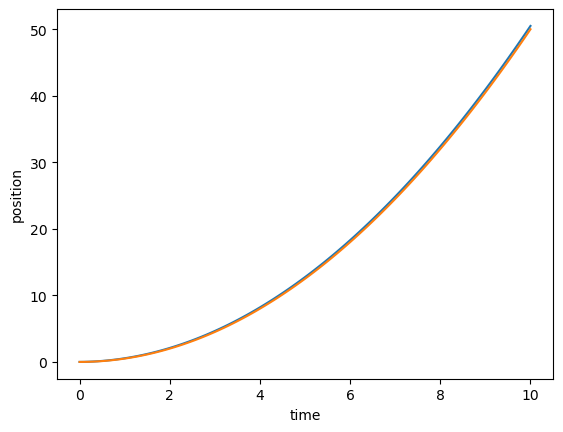

In [4]:
import matplotlib.pyplot as plt
import numpy as np
t=0.0
v=0
a=1
pos=0
time_list=[t]
pos_list=[pos]
t_max=10
num_step=100
dt=t_max/num_step

for i_step in range(num_step):
    t=t+dt
    v=v+a*dt
    pos=pos+v*dt
    
    time_list.append(t)
    pos_list.append(pos)

time_list = np.array(time_list) # convert to numpy array for easy calculation
pos_list = np.array(pos_list) #convert to numpy array for easy calculation

plt.plot(time_list, pos_list) #from the simulation, the blue curve
plt.plot(time_list, 0.5*time_list**2*a) #from the analytical formula, the orange curve
plt.xlabel('time')
plt.ylabel('position')

### case II: free fall with an upward velocity

The ball is thrown upwards and eventually comes back down due to the force of gravity.

Text(0, 0.5, 'position')

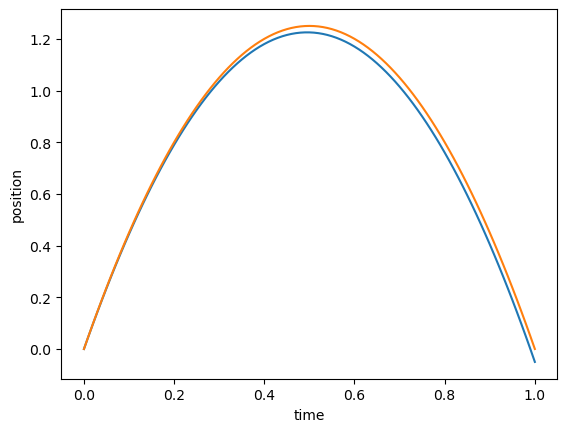

In [6]:
#with an initial velocity and free fall
t=0.0
v=5
a=-10
pos=0
time_list=[t]
pos_list=[pos]
t_max=1
num_step=100
dt=t_max/num_step

for i_step in range(num_step):
    t=t+dt
    v=v+a*dt
    pos=pos+v*dt
    
    time_list.append(t)
    pos_list.append(pos)

time_list = np.array(time_list) # convert to numpy array for easy calculation
pos_list = np.array(pos_list) #convert to numpy array for easy calculation

plt.plot(time_list, pos_list) #from the simulation, the blue curve
plt.plot(time_list, 5*time_list+0.5*a*time_list**2) #from the analytical formula, the orange curve
plt.xlabel('time')
plt.ylabel('position')

See what happens when we increase the number of steps. __For a fixed duration of motion, the more steps into which we break the motion, the more accurate the simulation becomes.__ In practice, when analytical result is not available, we keep increasing number of steps to make sure the result does not change.

Text(0, 0.5, 'position')

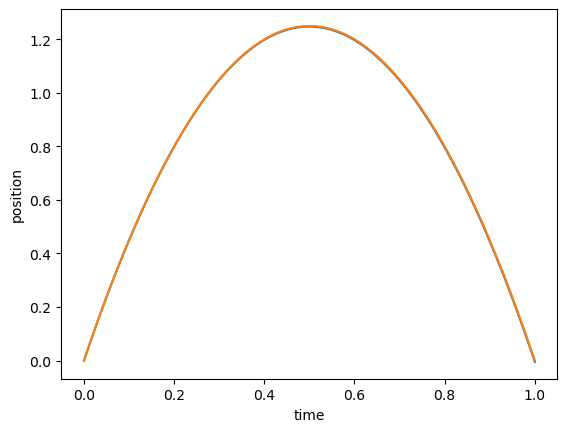

In [7]:
#with an initial velocity and free fall
t=0.0
v=5
a=-10
pos=0
time_list=[t]
pos_list=[pos]
t_max=1
num_step=1000  # make num_step larger to improve accuracy
dt=t_max/num_step

for i_step in range(num_step):
    t=t+dt
    v=v+a*dt
    pos=pos+v*dt
    
    time_list.append(t)
    pos_list.append(pos)

time_list = np.array(time_list) # convert to numpy array for easy calculation
pos_list = np.array(pos_list) #convert to numpy array for easy calculation

plt.plot(time_list, pos_list) #from the simulation, the blue curve
plt.plot(time_list, 5*time_list+0.5*a*time_list**2) #from the analytical formula, the orange curve
plt.xlabel('time')
plt.ylabel('position')
# the agreement is better

### case III: The ball bouncing back from the floor

Text(0, 0.5, 'position')

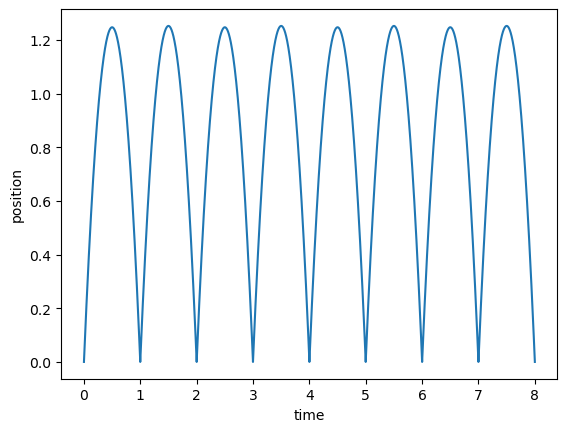

In [40]:
t=0.0
v=5
a=-10
pos=0.0
time_list=[t]
pos_list=[pos]
t_max=8
num_step=8000
dt=t_max/num_step

for i_step in range(num_step):
    t=t+dt
    v=v+a*dt
    pos=pos+v*dt
    
    if pos<0: #if ball hits floor, it bounces back
        v=-v
        pos=-pos
    time_list.append(t)
    pos_list.append(pos)

plt.plot(time_list, pos_list) #from the simulation, the blue curve
plt.xlabel('time')
plt.ylabel('position')


Isn't this amazing? We can simulate the different types of motions using the same update rules, just changing the initial conditions and the acceleration. This is the power of simulation. 

This is also very similar to how nature works. The same physical laws apply to different systems. The vast different phenomena we observe in nature arise from different initial conditions.

---

# motion with varying acceleration
In general the acceleration is not constant.

\begin{equation}
\begin{aligned}
t_{n+1} &= t_{n} + \Delta t \\
v_{n+1} &= v_{n} + a_n \Delta t\\
x_{n+1} &= x_{n} + v_{n+1} \Delta t ?
\end{aligned}
\end{equation}

In many case, the acceleration depends on the position and/or velocity of the object.





## Harmonic oscillator

https://youtu.be/gvPNrdfNo9g?si=utGzlIePoEdMj4CL


<div style='display:flex;align-items:center'>

<img src='https://github.com/slxuphys/tamu_phys_150/blob/master/gallery/hooke.png?raw=true' style='height:300px' height=300>
<div>

__Hooke's Law__
The force (F) needed to extend or compress a spring by some distance (x) scales linearly with respect to that distance.

$$ 
F = - k x
$$ 

Then from the Newton's second law, we get the acceleration,

$$
a = \frac{F}{m} = -\frac{k}{m} x
$$

</div>
</div>

## update rules for harmonic oscillator
$$
\begin{aligned}
t_{n+1} &= t_{n} + \Delta t \\
v_{n+1} &= v_{n} + a_n \Delta t\\
x_{n+1} &= x_{n} + v_{n+1} \Delta t \\
a_n &= -\frac{k}{m} x_n 
\end{aligned}
$$

__The acceleration depends on the position, therefore we need update the acceleration.__

### Case study

The block is moving right with a velocity 10 m/s. The coefficient $k/m = 1/s^2$.


Text(0, 0.5, 'position')

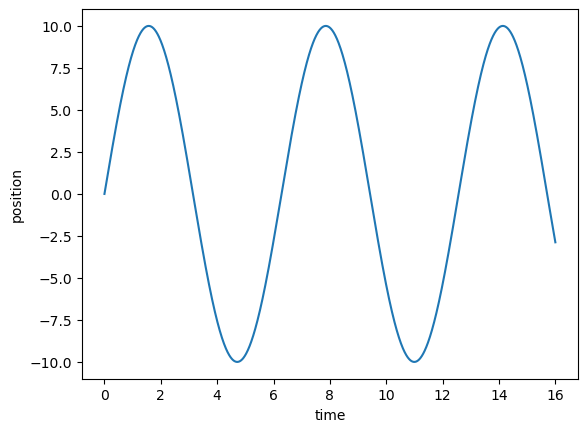

In [41]:
t=0.0
v=10
pos=0
time_list=[t]
pos_list=[pos]
t_max=16
num_step=1600
dt=t_max/num_step


for i_step in range(num_step):
    t=t+dt
    a=-1*pos #the acceleration now depends on the position
    v=v+a*dt
    pos=pos+v*dt
    
    time_list.append(t)
    pos_list.append(pos)

plt.plot(time_list, pos_list) #from the simulation, the blue curve
#plt.plot(time_list, 5*np.array(time_list)+0.5*np.array(time_list)**2*a) #from the analytical formula, the orange curve
plt.xlabel('time')
plt.ylabel('position')

### Case II: including friction

The force due to friction is opposite to the direction of the velocity and its magnitude is a constant.

$$f = -\gamma \frac{v}{|v|}$$

When $v$ is positive (moving right), the friction is negative (to the left), and vice versa.

Text(0, 0.5, 'position')

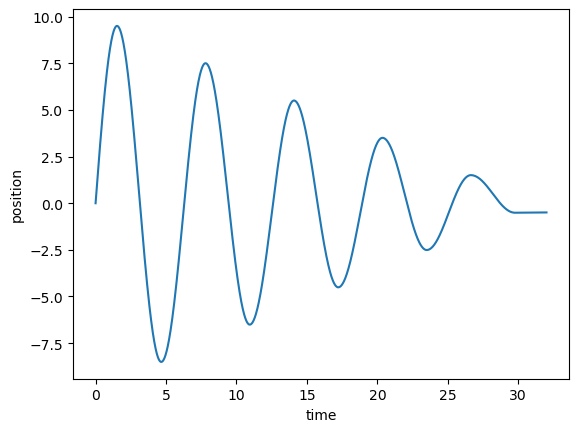

In [ ]:
t=0.0
v=10
pos=0
gamma = 0.5
time_list=[t]
pos_list=[pos]
t_max=32
num_step=1600
dt=t_max/num_step


for i_step in range(num_step):
    t=t+dt
    a=-1*pos - gamma*v/abs(v) #the acceleration now depends on the position
    v=v+a*dt
    pos=pos+v*dt
    
    time_list.append(t)
    pos_list.append(pos)

plt.plot(time_list, pos_list) 
plt.xlabel('time')
plt.ylabel('position')

The oscillation is damped by the friction.

# Motion in two dimension. (brief)

For motion in two dimension, the position of a ball is 2d vector $(x(t), y(t))$, which depends on time. Similarly, the velocity and the acceleration are also vectors. 

We need to apply the update rule in both direction.

In x direction:

$$
v_x(t+dt) = v_x(t) + a_x dt
$$

$$
x(t+dt) = x(t) + v_x(t+dt) dt
$$

In y direction:

$$
v_y(t+dt) = v_y(t) + a_y dt
$$


$$
y(t+dt) = y(t) + v_y(t+dt) dt
$$

The goal is to get $x(t)$ as a function of time and $y(t)$ as a function of time. Then we plot $y$ as a function of $x$ to get the __trajectory__ of the ball.

### Simulating Pool Table (2D motion)

simulating the motion in x and y direction independently

<img src='https://github.com/slxuphys/tamu_phys_150/blob/master/gallery/pool_table.png?raw=true' style='height:400px' height=400>

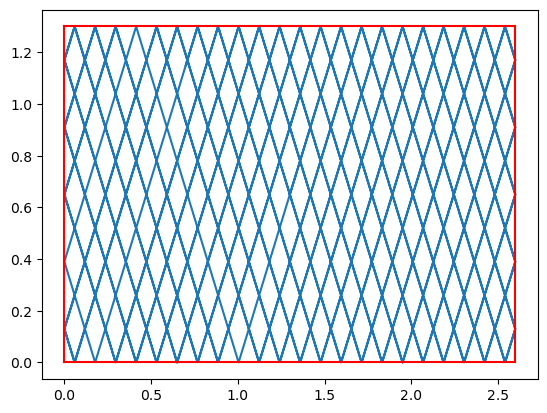

In [53]:
table_length = 2.6
table_width = 1.3

x = table_length/2  #initial x position
y = table_width/2  #initial y position 
#center of the table

pos_x = [x] # list of the position of the ball in the x direction, containing the initial value
pos_y = [y] # list of the position of the ball in the y direction, containing the initial value

t_max=100 #time step, 0.01 sec here
num_step =10000 #number of step, 100s in total
dt = t_max/num_step
v_x = 0.5 #initial velocity in the x direction
v_y = 1.1 #initial velocity in the y direction
t=0

for i_step in range(num_step):
    t = t + dt #update time
    x = x + v_x*dt #update x position
    y = y + v_y*dt #update y position
    if x > table_length: #if the ball goes out the right boundary
        v_x = - v_x
        x = table_length - (x -table_length)
    if x < 0: #if the ball goes out the left boundary
        v_x = - v_x
        x = -x 
    if y > table_width: #if the ball goes out the upper boundary
        v_y = -v_y
        y = table_width -(y - table_width)
    if y < 0: #if the ball goes out the lower boundary
        v_y = -v_y
        y = -y
    pos_x.append(x) #store new x to the list
    pos_y.append(y) #store new y to the list

plt.plot(pos_x,pos_y) #plot the trajectory of th ball
# plot the table
# the syntax to plot a single line connected by two points is plt.plot([x1,x2], [y1, y2])
plt.plot([0,table_length],[0,0],'r') #lower boundary; (0,0) -> (table_length, 0)
plt.plot([0,table_length],[table_width,table_width],'r') #upper boundary  (0,table_width) -> (table_length, table_width)
plt.plot([0,0],[0,table_width],'r') # left boundary  (0,0) -> (0, table_width)
plt.plot([table_length,table_length],[0,table_width],'r') #right boundary (table_length, 0) ->(table_length, table_width)

#play with different initial values!

We will see simulation of the 2D planetary motion in lecture 13.

# Laplace's demon (1814)

Pierre-Simon Laplace

<img src='https://upload.wikimedia.org/wikipedia/commons/3/39/Laplace%2C_Pierre-Simon%2C_marquis_de.jpg'>

According to determinism, if someone (the demon) knows the precise location and momentum of every atom in the universe, their past and future values for any given time are entailed; they can be calculated from the laws of classical mechanics.



## Defeat Laplace's demon

- too many atoms (~$10^{80}$) in the universe.
- Chaos (Butterfly effect) (lecture 15)

    - Can flapping of the wings of a butterfly cause a tornado in future?
(https://en.wikipedia.org/wiki/Butterfly_effect)


<img src='https://teepee12.com/wp-content/uploads/2017/01/butterfly-effect-cartoon.jpg?w=660'>



- Quantum mechanics (Schrodinger's Cat) (possible lecture 16)

<img src='https://tommccallum.com/wp-content/uploads/2021/06/m0schrodingerscatbox_m_White.jpg'>

The Nobel Prize in Physics 2021 was awarded "for groundbreaking contributions to our understanding of __complex systems__" with one half jointly to Syukuro Manabe and Klaus Hasselmann "for the physical modelling of Earth's climate, quantifying variability and reliably predicting global warming" and the other half to Giorgio Parisi "for the discovery of the interplay of disorder and fluctuations in physical systems from atomic to planetary scales."

The Nobel Prize in Physics 2022 was awarded "for experiments with entangled photons, establishing the violation of Bell inequalities and pioneering __quantum information science__"